<a href="https://colab.research.google.com/github/MaiteVillalon/ADA-informes/blob/main/BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Descripción del problema**

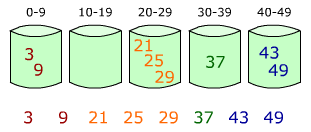

Bucket Sort o tambien llamado ordenamiento por casilleros es un algortimo de ordenamiento. Funciona distribuyendo los elementos de un array en diferentes de baldes y ordenanando cada uno de ellos. En este informe analizaremos con detalle diferentes aspectos de el, tales como funcionamiento, correctitud, tiempo de ejecución, entre otros.



```
Entrada: Arreglo de n elementos [a1, a2, a3...an]
Salida: Arreglo de entrada ordenado de manera ascendente [a1, a2, ...an], tal que a1 < a2 < a3...< an.
```



##**Descripción del algoritmo**


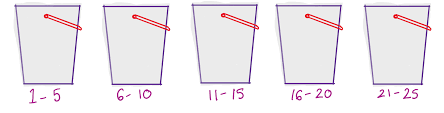

Como mencionamos anteriormente, **BucketSort** es una tecnica de ordenamiento, la cual ordena sus elementos distribuyendo los elementos del arreglo de entrada en diferentes grupos, los cuales llamamos **baldes**, el o los elementos de cada balde son ordenados de manera ascendente por otro algoritmo de ordenamiento o llamandose a si mismo recursivamente.

El algoritmo recibe por entrada un arreglo de n elementos y entrega por salida el mismo arreglo ordenado de forma ascendente.

**Pasos más importantes**

    1. Crear una colección de casilleros vacíos
    2. Colocar cada elemento a ordenar en un único casillero
    3. Ordenar individualmente cada casillero
    4. Devolver los elementos de cada casillero concatenados por orden

***Ejemplo paso a paso:***

Para este ejemplo trabajaremos con el siguiente arreglo **[0.47, 0.42, 0.15, 0.36]**

Primero se crearan n buckets, sea n la cantidad de elementos del arreglo.

len(arr) = 4, por ende se crearán 4 buckets y se concatenarán uno al lado del otro.

El siguiente paso es distribuir los elementos en sus respectivos buckets, por ende iremos revisando el arreglo de entrada:

0.47 * 10 = 4.7  Nos quedamos con su parte entera 4, por ende este elemento será puesto en el bucket número 4 (indice 3)

```
 0          1           2            3
            
                                   [0.47]
```

0.42 * 10 = 4.2  Nos quedamos con su parte entera 4, por ende este elemento será puesto en el bucket número 4 (indice 3)





```


 0          1           2            3
            
                                 [0.47, 0.42]
```

0.15 * 10 = 1.5  Nos quedamos con su parte entera 1, por ende este elemento será puesto en el bucket número 1 (indice 0)        
```

          0          1           2            3
            
       [1.5]                                [0.47, 0.42]

```

0.35 * 10 = 3.5  Nos quedamos con su parte entera 1, por ende este elemento será puesto en el bucket número 3 (indice 2) 


```
          0          1           2            3
            
       [0.15]                 [0.35]     [0.47, 0.42]
```

Ahora, a traves de insertionSort se ordena cada bucket, quedando lo siguiente:

```
          0          1           2            3
            
       [0.15]                 [0.35]     [0.42, 0.45]
```

El paso final es obtener cada elemento de los bucket y asignarlo al arreglo original

Arr[0] = 0.15
Arr[1] = 0.35
Arr[2] = 0.42
Arr[3] = 0.45

Y asi obtenemos el arreglo ordenado de manera ascendente [0.15, 0.35, 0.42, 0.45]

##**Implementación del algoritmo**

In [ ]:
import random
from termcolor import colored
import copy


def insertion_sort(arr):
    n = len(arr)
    for i in range (1, len(arr)):
      aux = arr[i]
      k = i-1


      while k >= 0 and aux < arr[k]:
            arr[k+1] = arr[k]
            k = k-1
      arr[k+1] = aux

    return arr 

In [ ]:
def bucketSort(array,verbose):
    bucket = []

    # Crear los baldes vacíos 
    for i in range(len(array)):
        bucket.append([])

    # Se insertan los elementos en los baldes
    for j in array:
        index_b = int(10 * j)
        bucket[index_b].append(j)
        if (verbose == True):
          print(j , "va en el balde número", index_b)


    # Se ordenan los elementos de cada balde
    for i in range(len(array)):
        bucket[i] = insertion_sort(bucket[i])

    # Se obtienen los elementos ordenados
    k = 0
    for i in range(len(array)):
        for j in range(len(bucket[i])):
            array[k] = bucket[i][j]
            k += 1
    return array



verbose = False
array = [.42, .32, .33, .52, .37, .47, .51]
print("Arreglo de entrada: ",array)
print("Arreglo ordenado: ", bucketSort(array,verbose))


Arreglo de entrada:  [0.42, 0.32, 0.33, 0.52, 0.37, 0.47, 0.51]
Arreglo ordenado:  [0.32, 0.33, 0.37, 0.42, 0.47, 0.51, 0.52]


##**Opción verbose**

In [ ]:
verbose = True
array = [.42, .32, .33, .52, .37, .47, .51]
print("Arreglo de entrada: ",array)
print("Arreglo ordenado: ", bucketSort(array,verbose))

Arreglo de entrada:  [0.42, 0.32, 0.33, 0.52, 0.37, 0.47, 0.51]
0.42 va en el balde número 4
0.32 va en el balde número 3
0.33 va en el balde número 3
0.52 va en el balde número 5
0.37 va en el balde número 3
0.47 va en el balde número 4
0.51 va en el balde número 5
Arreglo ordenado:  [0.32, 0.33, 0.37, 0.42, 0.47, 0.51, 0.52]


##**Correctitud**

En esta sección probaremos la correctitud del algoritmo.


##***Teorema de correctitud 1***

"El algoritmo BucketSort ordenará de manera ascendente los elementos del arreglo de entrada" 

Para probar la correctitud de BucketSort analizaremos primero las partes de su código.

**Creación de baldes**: La creacion de baldes es un proceso bastante sencillo, a traves de un ciclo for se crear n casillas vacías y se concatenan una con otra, por lo que tal proceso siempre funcionará correctamente.

**Distribucion de elementos a buckets**: Para distribuir los elementos del arreglo de entrada en los diferentes bucket lo que se realiza es nuevamente bastante sencillo, **se multiplica el número por 10**, obteniendo así el indice de su bucket correspondiente, ejemplo:

```
num = 0,52
0,52 * 10 = 5,2 #Nos quedamos con su parte entera
Y asi obtenemos el número 5, correspondiente al indice del bucket correcto.

```

Este proceso se realiza a traves de un for y una multiplicación y siempre funcionarán correctamente.

**Ordenamiento de cada bucket**: Para ordenar cada bucket se llama a el algoritmo Insertion Sort, probaremos su correctitud.


**Obtención de elementos:** Para finalizar, a travez de dos for anidados se recorre cada bucket obteniendo los elementos ya ordenados, si el ordenamiento se realiza correctamente, este proceso tambien lo hará, probraremos la correctitud del ordenamiento a continuacion.

##***Teorema de correctitud 2*** 
El algortimo **Insertion Sort** entregara un arreglo ordenado de forma ascende con los mismos datos del arreglo entregado por el usuario.

####**Prueba del teorema 2**
Analizando su código, podemos notar que por cada pasada i que realizó, los elementos del arreglo desde **i - 1** hasta **i = 0** estaran ordenados en orden ascendente.

A continuacion demostraremos la siguiente **propiedad invariante de bucle** del algoritmo Insertion Sort:



*   "Al comiezo de cada pasada  i (iteración), obtendremos un subarreglo ordenado desde la posición ( i -1 ) hasta ( i = 0 ), con los mismos elementos en esas posiones del arreglo de entrada".


**arreglo de ejemplo = arr = [7,6,14,2,5]**

**Comienzo**

En la primera pasada (i = 1), tenemos que **desde ( i - 1 ) hasta (1 = 0)** veremos un subarreglo ordenado [7] con los mismo numeros en esas posiciones del arreglo de entrada. Todos los elementos anteriores a i cumplen con la propiedad.

**Mantención**

Para todas las interaciones, tendremos que al comienzo se cumplira la propiedad desde ( i - 1 ) hasta  ( i = 0 ).


**Finalización**

Si observamos el codigo de ejemplo, podremos ver que durante todo el algoritmo se va cumpliendo la condicion planteada, en la iteracion i, correspondiente a analizar el numero en la posicion i del arreglo veremos que en todos los elementos anteriores a i tendremos un subarreglo ordenado de forma ascendente.


####**Prueba del teorema 1**

Despues de analizar los pasos de BucketSort pudimos notar que el unico procedimiento que necesitabamos probar era Insertion Sort, por ende, basandonos en el teorema de correctitud 2, asumimos que el ordenamiento de cada bucket se realizará correctamente y por ende el arreglo quedara ordenado de menor a mayor.



##**Tiempo de ejecución**
**Analisis bucket sort**

Para analizar el costo del tiempo de ejecución del bucket sort debemos primero tener en consideración a las llamadas del insertion sort debemos dejar una variable aleatoria n la cual tiene el numero de elementos en un bucket[i],recordemos que el tiempo de ejecución del insertion sort en un caso promedio es o(n^2), todos los otros procesos de bucketsort toman tiempo O(n), por ende el tiempo de ejecucion de bucket sort es:

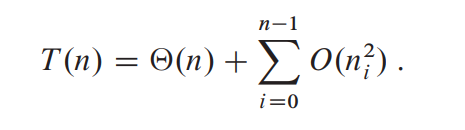



Ahora analizamos el peor caso del tiempo de ejecución del bucket sort, se espera un valor de tiempo de ejecución, aquí vamos a esperar la posibilidad que los elementos ingresados tengan la distribución necesaria para ambas partes usando linealidad.


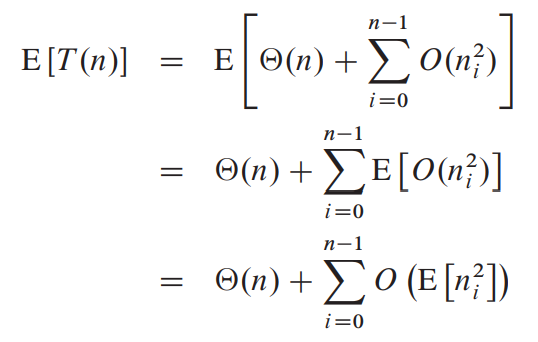

Ahora podemos afirmar que:

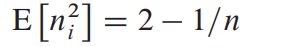

Si evaluamos los valores esperados en la primera sumatoria podremos concluir que el tiempo de ejecución del caso promedio es O(n). También podemos observar que no es necesario que la entrada sea uniforme gracias a la propiedad de suma de cuadrados y esta propiedad nos indica que el bucket sort siempre se ejecutara en tiempo lineal .

A diferencia del peor caso es O(n^2) que seria por el insertion sort que en resumen seria cuando está ordenado de mayor a menor porque tendría que realizar una gran cantidad de comparaciones, el tiempo de ejecución seria (O(n^2)).



##**Experimentos**

Para finalizar este informe, mostraremos comparaciones entre diferentes algoritmos para asi analizar sus rendimientos

##**BucketSort v/s RadixSort**

Compararemos el algoritmo BuckerSort con RadixSort, implementaremos bucketsort para que ordene números enteros y veremos sus rendimientos.

In [ ]:
#Codigo de RadixSort. el cual es implementado con countingSort

def countingSort(arr, exp1):
 
    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    for i in range(0, len(arr)):
        arr[i] = output[i]
 
def radixSort(arr):
    max1 = max(arr)
    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10
    return arr


In [ ]:
#Codigo de bucketSort implementado para números enteros

def bucket_sort(input_list):
    
    max_value = max(input_list)
    size = max_value/len(input_list)

    
    buckets_list= []
    for x in range(len(input_list)):
        buckets_list.append([]) 

    for i in range(len(input_list)):
        j = int (input_list[i] / size)
        if j != len (input_list):
            buckets_list[j].append(input_list[i])
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])

    for z in range(len(input_list)):
        insertion_sort(buckets_list[z])
            
    final_output = []
    for x in range(len (input_list)):
        final_output = final_output + buckets_list[x]
    return final_output

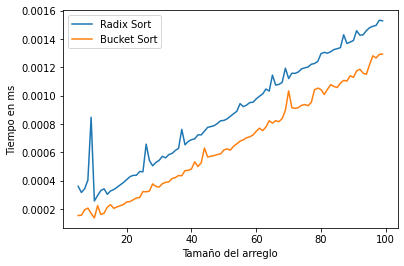

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
y1=[]

for n in range(5,100):
  cont = [0]
  a = random.sample(range(1, 1000), n)

  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({a})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Radix Sort", "Bucket Sort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

##**Análisis de resultados**

Podemos notar que BucketSort demora menos tiempo que RadixSort (implementado con counting sort). Esto puede deberse a que radixsort tiene que llamar a counting sort una gran cantidad de veces si el mayor número tiene una gran cantidad de decimales, por el otro lado bucketsort solo la cantidad de buckets que existan.

##**BucketSort v/s MergeSort**

Compararemos los rendimientos de los algoritmos MergeSort y BucketSort.

In [ ]:
def mergeSort(arr):
    
    # Pregunto si el arreglo tiene más de un elemento
    if len(arr) > 1:

        # Calculo cual es la mitad del array
        #mitad = len(arr)//2
        mitad = len(arr)//2

        izq= (arr[:mitad])
        der=(arr[mitad:])
 
        # Con estas llamadas a MergeSort se ordenan los dos subarreglos 
        #  que se subdividio arr y luego se llama a la funcion merge para
        #  que los combine de forma ordenada.

        mergeSort(izq )
        mergeSort(der )
        arr[:]=merge(izq,der)


def merge(izq, der):
    
    i, j = 0, 0 # Variables de incremento
    result = [] # Lista de resultado
 
   # Se elige el menor de los subarreglos
    while(i < len(izq) and j < len(der)):
        if (izq[i] < der[j]):
            result.append(izq[i])
            i += 1

        else:
            result.append(der[j])
            j += 1

            
 
   # Agregamos los resultados a la lista
    result += izq[i:]
    result += der[j:]

 
    # Retornamos el resultados
    return result
 

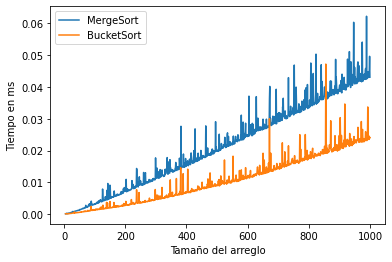

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
y1=[]

for n in range(5,1000):
  
  a = random.sample(range(1, 1000), n)
 
  t1 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({a})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["MergeSort", "BucketSort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

##**Análisis de resultados**

Podemos notar que claramente bucketsort toma menos tiempo en ejecutarse, tambien podemos ver que a medida que el tamaño del arreglo crece, la brecha entre estos dos algoritmos aumenta. Recordemos que mergesort debe llamarse recursivamente hasta que se obtengan arreglos de un solo elemento y posteriormente comienza la union de estos, por lo que toma más tiempo que distribuir los elementos en bucket y ordenarlos.